<a href="https://colab.research.google.com/github/shab29/Regression_capstoneProject/blob/main/Sales_prediction_SB5_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
store_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/Copy of store.csv')
sale_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/Copy of Rossmann Stores Data.csv')

In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


# Merge the Data using Store

In [5]:
DF=sale_data.merge(right=store_data,on="Store",how="left")

In [6]:
#check for duplicate data
print(DF.duplicated().sum())

0


In [ ]:
DF

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

* Convert the Date into Date time format.

In [8]:
from datetime import datetime
DF["Date"] = DF["Date"].astype(np.datetime64)

In [9]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* There are null values in Competition Distance, Competition Opend Since Month, Competition Open Since Year, Promo2SinceWeek, Promo2SinceYear, PromoInterval.
* Promo2SinceWeek and year has equal number of null values. It is because when there is no promo2 that means there will be no value in Promo2SinceWeek and Promo2SinceYear.


# Filling the null values

Text(0, 0.5, 'PDF')

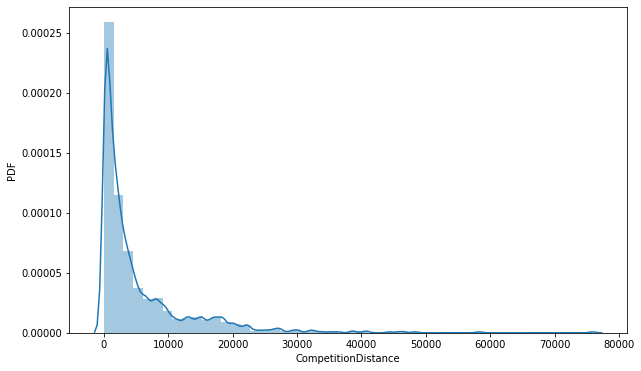

In [10]:
#checking the distribution of CompetitionDistance
plt.subplots(figsize=(10, 6))
sns.distplot(x = DF["CompetitionDistance"])
plt.xlabel("CompetitionDistance")
plt.ylabel("PDF")


In [11]:
#Checking the median of Competition Distance according to each store type
DF.groupby(['StoreType'])['CompetitionDistance'].median()

StoreType
a    1790.0
b     900.0
c    1650.0
d    5070.0
Name: CompetitionDistance, dtype: float64

* We will fill up the NaN in Competition distance according to median of each store type.

In [12]:
#Finding the median distance for each store type
median_a=round(DF.loc[(DF['StoreType'] == 'a'), 'CompetitionDistance'].median(), 1)
median_b=round(DF.loc[(DF['StoreType'] == 'b'), 'CompetitionDistance'].median(), 1)
median_c=round(DF.loc[(DF['StoreType'] == 'c'), 'CompetitionDistance'].median(), 1)
median_d=round(DF.loc[(DF['StoreType'] == 'd'), 'CompetitionDistance'].median(), 1)

In [13]:
#filling the null values of CompetitionDistance according to store type
DF.loc[DF['StoreType']=='a']=DF.loc[DF['StoreType']=='a'].fillna(value={'CompetitionDistance':median_a})
DF.loc[DF['StoreType']=='b']=DF.loc[DF['StoreType']=='b'].fillna(value={'CompetitionDistance':median_b})
DF.loc[DF['StoreType']=='c']=DF.loc[DF['StoreType']=='c'].fillna(value={'CompetitionDistance':median_c})
DF.loc[DF['StoreType']=='d']=DF.loc[DF['StoreType']=='d'].fillna(value={'CompetitionDistance':median_d})

In [14]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* Now we have 0 null values in Competition Distance.

Text(0, 0.5, 'PDF')

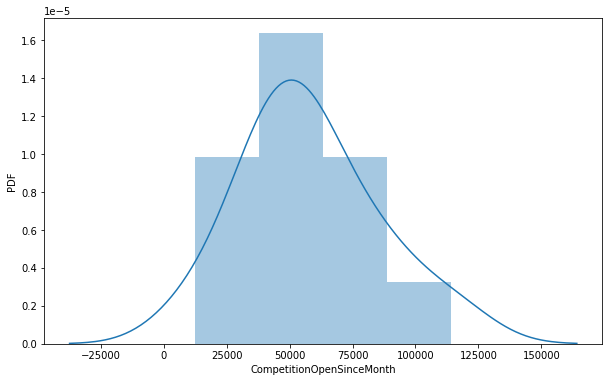

In [15]:
#Check the distribution of CompetitionOpenSinceMonth
plt.subplots(figsize=(10, 6))
sns.distplot(x = DF["CompetitionOpenSinceMonth"].value_counts())
plt.xlabel("CompetitionOpenSinceMonth")
plt.ylabel("PDF")

* The distribution is symmetric, so mean and median will be approximately symmetrical. We can use any of them to fill NaN.

In [16]:
#Let's check mean value for CompetitionOpenSinceMonth according to each store type
DF.groupby(['StoreType'])['CompetitionOpenSinceMonth'].mean()

StoreType
a    7.176508
b    6.666667
c    7.048265
d    7.426956
Name: CompetitionOpenSinceMonth, dtype: float64

In [17]:
DF.groupby(['StoreType'])['CompetitionOpenSinceMonth'].median()

StoreType
a    8.0
b    6.0
c    7.0
d    8.0
Name: CompetitionOpenSinceMonth, dtype: float64

* we will use the median since it is a whole number.

In [18]:
#Finding the median month for each store type
medianMonth_a=round(DF.loc[(DF['StoreType'] == 'a'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_b=round(DF.loc[(DF['StoreType'] == 'b'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_c=round(DF.loc[(DF['StoreType'] == 'c'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_d=round(DF.loc[(DF['StoreType'] == 'd'), 'CompetitionOpenSinceMonth'].median(), 1)

In [19]:
#filling the null values of CompetitionOpenSinceMonth according to store type
DF.loc[DF['StoreType']=='a']=DF.loc[DF['StoreType']=='a'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_a})
DF.loc[DF['StoreType']=='b']=DF.loc[DF['StoreType']=='b'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_b})
DF.loc[DF['StoreType']=='c']=DF.loc[DF['StoreType']=='c'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_c})
DF.loc[DF['StoreType']=='d']=DF.loc[DF['StoreType']=='d'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_d})

In [20]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* There are 0 null values in CompetitionOpenSinceMonth now.
* We can use same approach for CompetitionOpenSinceYear.

In [21]:
DF.groupby(['StoreType'])['CompetitionOpenSinceYear'].median()

StoreType
a    2010.0
b    2008.0
c    2009.0
d    2010.0
Name: CompetitionOpenSinceYear, dtype: float64

In [22]:
#Finding the median Year for each store type
medianYear_a=round(DF.loc[(DF['StoreType'] == 'a'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_b=round(DF.loc[(DF['StoreType'] == 'b'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_c=round(DF.loc[(DF['StoreType'] == 'c'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_d=round(DF.loc[(DF['StoreType'] == 'd'), 'CompetitionOpenSinceYear'].median(), 1)

#filling the null values of CompetitionOpenSinceYear according to store type
DF.loc[DF['StoreType']=='a']=DF.loc[DF['StoreType']=='a'].fillna(value={'CompetitionOpenSinceYear':medianYear_a})
DF.loc[DF['StoreType']=='b']=DF.loc[DF['StoreType']=='b'].fillna(value={'CompetitionOpenSinceYear':medianYear_b})
DF.loc[DF['StoreType']=='c']=DF.loc[DF['StoreType']=='c'].fillna(value={'CompetitionOpenSinceYear':medianYear_c})
DF.loc[DF['StoreType']=='d']=DF.loc[DF['StoreType']=='d'].fillna(value={'CompetitionOpenSinceYear':medianYear_d})

In [23]:
DF.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

* Now we need to fill null values for Promo2SinceWeek, Promo2SinceYear and PromoInterval.
* If there is no Promo2 then its corresponding value of week, Year and Interval will be missing.
* We can replace the null value of week and Year with the week and Year with the Date given in the dataset.

In [24]:
DF['Promo2SinceWeek'].fillna(DF["Date"].dt.weekofyear,inplace=True)

In [25]:
DF['Promo2SinceYear'].fillna(DF["Date"].dt.year,inplace=True)

In [26]:
#Check the unique values of PromoInterval
DF['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

* We can replace the null value with "NA" because of the promo2 is not applied then the promo interval is also not aplicable here.

In [27]:
DF['PromoInterval'].fillna("NA",inplace=True)

In [28]:
DF['PromoInterval'].unique()

array(['NA', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [29]:
DF.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [30]:
DF['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

* State holiday 0 is entered as string and integer. Let's convert it into string only so that it would be easier to do the encoding later.

In [31]:
DF["StateHoliday"].replace({0:"0"}, inplace = True)

In [32]:
DF['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

# Feature Engineering

* We can Convert the CompetitionOpenSinceMonth and SinceYear variable into one variable which will give the total number of months since competition opened.

In [33]:
DF['CompetitionOpened'] = (DF["Date"].dt.year - DF['CompetitionOpenSinceYear'])*12 + (DF["Date"].dt.month- DF['CompetitionOpenSinceMonth'])

In [34]:
DF["CompetitionOpened"].describe()

count    1.017209e+06
mean     5.575757e+01
std      6.041036e+01
min     -3.100000e+01
25%      2.900000e+01
50%      4.700000e+01
75%      7.400000e+01
max      1.386000e+03
Name: CompetitionOpened, dtype: float64

In [35]:
# To deal with the Negative values in the periodical column

DF['CompetitionOpened'] = DF['CompetitionOpened'].apply(lambda x:abs(x) if x < 0 else x)

In [36]:
DF["CompetitionOpened"].describe()

count    1.017209e+06
mean     5.753876e+01
std      5.871635e+01
min      0.000000e+00
25%      2.900000e+01
50%      4.700000e+01
75%      7.400000e+01
max      1.386000e+03
Name: CompetitionOpened, dtype: float64

* Similarly we can convert Promo2SinceWeek and SinceYear variables into one variable.

In [ ]:
DF['Promo2Opened'] = (DF["Date"].dt.year - DF['Promo2SinceYear'])*12 + (DF["Date"].dt.weekofyear- DF['Promo2SinceWeek'])/4

In [ ]:
DF["Promo2Opened"].describe()

count    1.017209e+06
mean     1.246706e+01
std      1.966242e+01
min     -2.950000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+01
max      7.200000e+01
Name: Promo2Opened, dtype: float64

In [ ]:
# To deal with the Negative values in the periodical column

DF['Promo2Opened'] = DF['Promo2Opened'].apply(lambda x:abs(x) if x < 0 else x)

In [ ]:
DF["Promo2Opened"].describe()

count    1.017209e+06
mean     1.375603e+01
std      1.878324e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.525000e+01
max      7.200000e+01
Name: Promo2Opened, dtype: float64

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

* Sales is dependent variable.
* Independent variables to be used are Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, Promo2, PromoInterval, CompetitionOpened and Promo2Opened.
* Numerical features are Customers, CompetitionDistance, CompetitionOpened and Promo2Opened.

In [ ]:
DF.describe().columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpened', 'Promo2Opened'],
      dtype='object')

* The sale will be 0 when store is close. So we can drop the data where the store is closed.
* we can drop the features CompetitionOpenSinceMonth, CompetitionOpenSincYear, Promo2SinceWeek and Promo2SinceYear.

In [ ]:
#Droping the features CompetitionOpenSinceMonth, CompetitionOpenSincYear, Promo2SinceWeek and Promo2SinceYear.
DF.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [ ]:
#Droping the data where store is closed or sale is 0.
DF.drop(DF[(DF['Sales'] ==0)].index, inplace=True)

In [ ]:
#drop the column Open because it will only consist 1
DF.drop(['Open'],axis=1,inplace=True)

In [ ]:
DF.describe().columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'CompetitionOpened', 'Promo2Opened'],
      dtype='object')

In [ ]:
numeric_features=DF.describe().columns[3:]

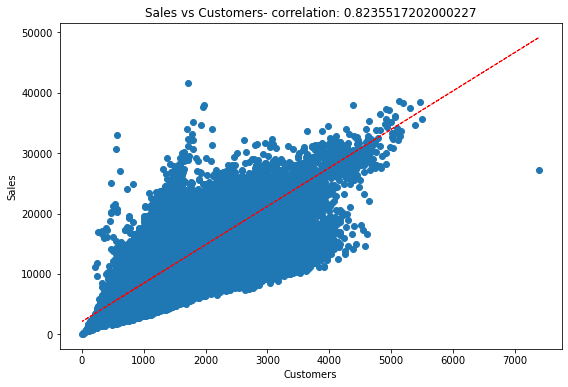

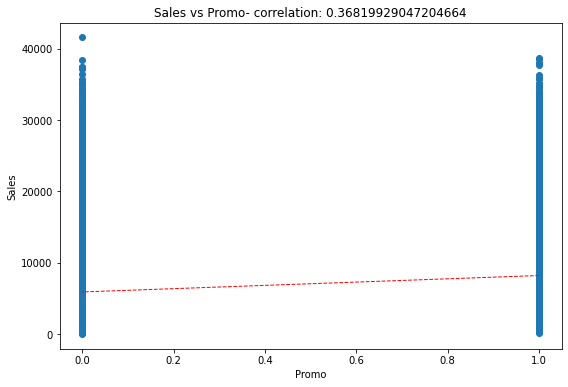

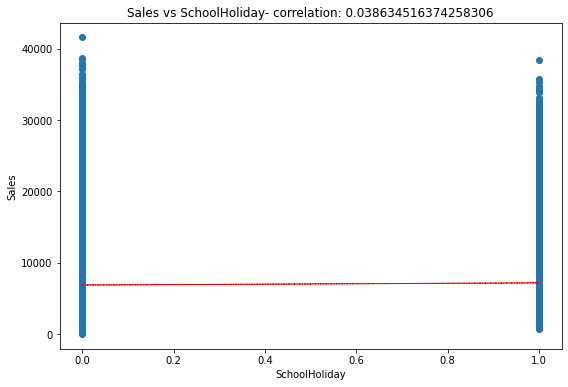

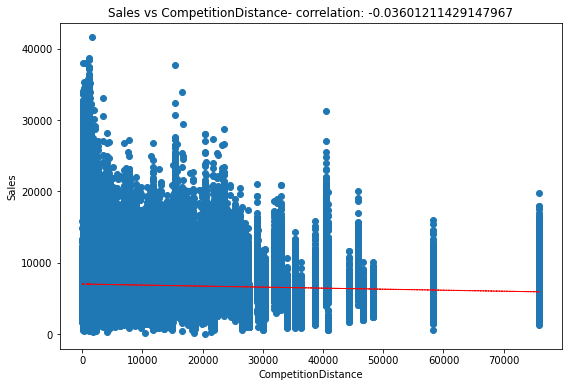

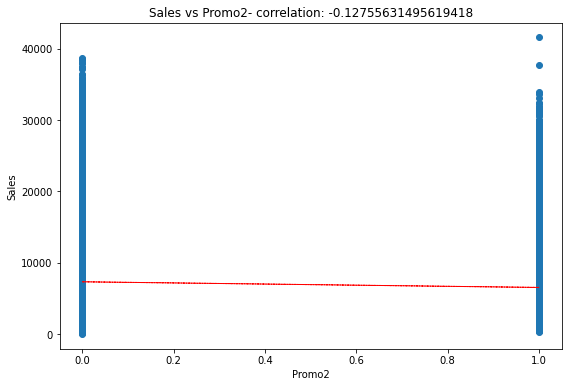

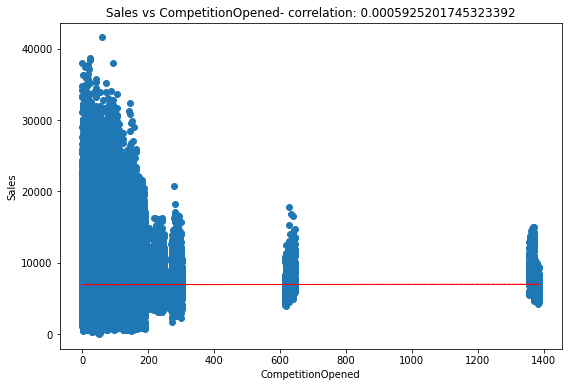

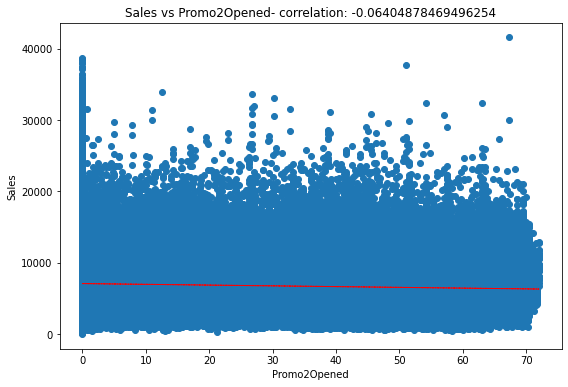

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = DF[col]
    label = DF['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(DF[col], DF['Sales'], 1)
    y_hat = np.poly1d(z)(DF[col])

    plt.plot(DF[col], y_hat, "r--", lw=1)

plt.show()

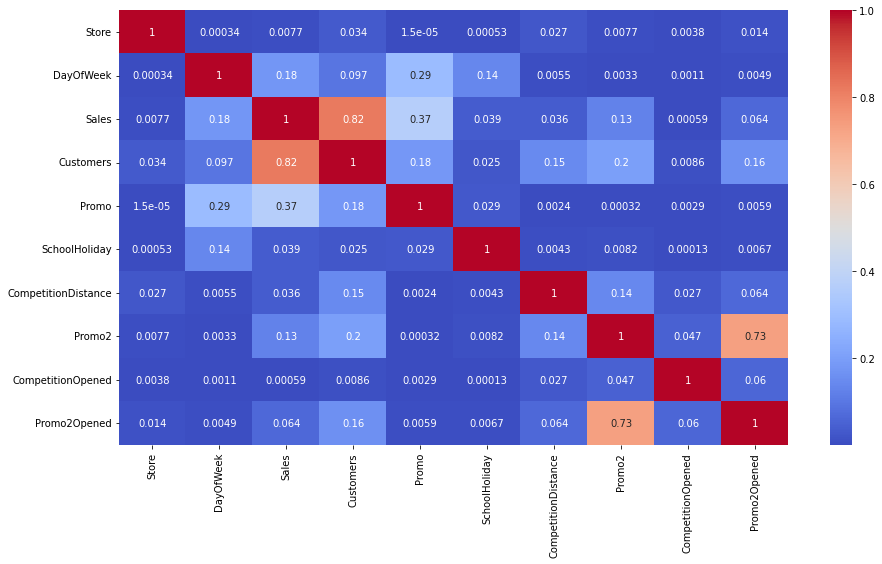

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = DF.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

* Promo2 is highly correlated with Promo2Opened because whenever there is no Promo2 then promo2Opened will always be 0.


In [ ]:
# One hot encoding
dataset_pr = pd.get_dummies(DF, columns=['StateHoliday','StoreType','Assortment','PromoInterval'])

In [ ]:
dataset_pr.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,CompetitionOpened,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_NA
0,1,5,2015-07-31,5263,555,1,1,1270.0,0,82.0,...,0,1,0,1,0,0,0,0,0,1
1,2,5,2015-07-31,6064,625,1,1,570.0,1,92.0,...,0,0,0,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,14130.0,1,103.0,...,0,0,0,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,620.0,0,70.0,...,0,1,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,29910.0,0,3.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
dataset_pr.describe().columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'CompetitionOpened', 'Promo2Opened',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_NA'],
      dtype='object')

In [ ]:
features=list(numeric_features.copy())
print(features)

['Customers', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'CompetitionOpened', 'Promo2Opened']


In [ ]:
features.extend(['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_NA'])

In [ ]:
features

['Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'CompetitionOpened',
 'Promo2Opened',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'PromoInterval_NA']

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [ ]:
y = np.log10(dataset_pr['Sales']) # log transformation of dependent variable Sales

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2) 
print(X_train.shape)
print(X_test.shape)

(675470, 22)
(168868, 22)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7459398506568315

In [ ]:
reg.coef_  #regression coefficient of each feature

array([ 1.62305558e-01,  4.41026879e-02,  2.95510143e-03,  9.35352731e-03,
        1.77501410e+10,  1.68441264e-03,  1.33426951e-02, -3.21578616e+10,
       -2.80867704e+10, -1.28424337e+10, -8.98693374e+09,  8.10757876e+10,
        2.18834363e+10,  5.53908342e+10,  7.50129610e+10,  7.34350958e+10,
        1.44320544e+10,  7.33440932e+10, -6.27678835e+09, -8.86545648e+09,
       -5.76000813e+09,  7.95196306e+09])

In [ ]:
reg.intercept_ #intercept of regression equation

3.8034746937246697

In [ ]:
y_pred=reg.predict(X_test)

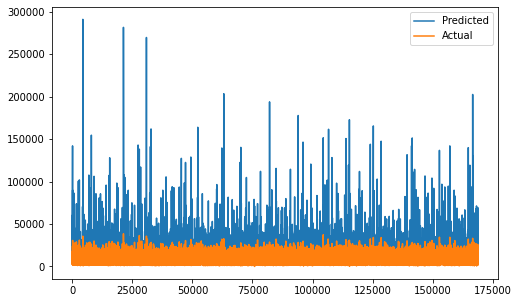

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
#Creating the Function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)


  #calculate metrics and print the results for test set
  
  #Mean Absolute Error or MAE
  
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  
  #Mean Squared Error or MSE
  
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  
  #Root Mean Squared Error or RMSE
  
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  
  #R2
  
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [ ]:
#Creating the function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

In [ ]:
# Columns names in the Metrics comparision Table.

comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Lin_reg=model_evaluation('Linear Regression',reg,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.069696
The Mean Squared Error for the validation set is 0.008661
The Root Mean Squared Error for the validation set is 0.093062
The R^2 for the validation set is 0.745386
The Adjusted R^2 for the validation set is 0.745353


In [ ]:
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.069887,0.008687,0.093205,0.745405,0.745397,0.069671,0.008603,0.092753,0.747543,0.74751
1,Linear Regression,0.069887,0.008687,0.093205,0.745405,0.745397,0.069671,0.008603,0.092753,0.747543,0.74751


In [ ]:
combined_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/combined_result2.csv')
result = combined_df.append(comparison_df)
result.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
result.set_index("Model_Name", inplace = True)
display(result.drop_duplicates())


,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
Model_Name,,,,,,,,,,
Decision Tree Regressor,0.000004,0.000001,0.001098,0.999999,0.999999,0.197009,0.073922,0.271887,0.921524,0.921476
Random Forest Regressor,0.043688,0.003573,0.059772,0.996427,0.996427,0.141870,0.035382,0.188100,0.962439,0.962416
Linear Regression,0.069887,0.008687,0.093205,0.745405,0.745397,0.069671,0.008603,0.092753,0.747543,0.747510


# Hypothesis Testing

1. The difference between mean sale when promo applied and not applied

Null hypothesis: The mean sale when promo is not applied is equal to when promo is applied.

Alternate hypothesis: The mean sale is not equal when promo is not applied and when applied.
$$\begin{aligned}H_0:\mu_1&=\mu_2\\H_1:\mu_1&\ne\mu_2\end{aligned}$$


In [43]:
#importing the libraries to conduct hypothesis test
import scipy.stats as stats
import statistics

In [50]:
#Making two different datasets, data_1 is the sale data when Promo is not applied and data_2 is the sale data when Promo is applied
data_1=DF.loc[(DF['Promo'] == 0), 'Sales']
data_2=DF.loc[(DF['Promo']==1),'Sales']

In [52]:
#printing the variance of both the dataset and their ratio
print('variance of data_1 is %s'%(statistics.variance(data_1)))
print('variance of data_2 is %s'%(statistics.variance(data_2)))
print('ratio of variances is %r'%(statistics.variance(data_1)/statistics.variance(data_2)))

variance of data_1 is 11850462.139515512
variance of data_2 is 11689735.337728595
ratio of variances is 1.013749396127744


The variances are approximately equal, so two sample t-test with equal equal variance can be used here.

In [53]:
#Performing the t-test and finding the p-value
stats.ttest_ind(a=data_1, b=data_2, equal_var=True)

Ttest_indResult(statistic=-511.5471867316377, pvalue=0.0)

* The p-value is 0 which is smaller than 0.05 significance level. So we can reject the null hypothesis and it can be concluded that mean sale is not equal when promo is applied.

* We have used **Two sample t-test with equal variance**.
* We were comparing mean of two independent populations and we have observed that the sample variances are approximately equal. So to compare the mean of two independent population with equal variance we can use two sample t-test with equal variance.

2. Comparing the mean sale value for assortment type

There are 3 types of assortment of a store and we will compare the mean sale of these 3 assortment stores.

Null hypothesis: The mean sale for each assortment store is equal.
$$H_0:\mu_1=\mu_2=\mu_3$$

Alternate hypothesis: At least one assortment will have different mean sale.

In [54]:
#Making three different datasets, data_1 is the sale data when Assortment "a", data_2 is the sale data when Assortment "b" 
#and data_3 is the sale data when Assortment "c"
data_1=DF.loc[(DF['Assortment'] == 'a'), 'Sales']
data_2=DF.loc[(DF['Assortment']=='b'),'Sales']
data_3=DF.loc[(DF['Assortment']=='c'),'Sales']

In [55]:
#Importing the library for F-test and conducting the test
from scipy.stats import f_oneway
f_oneway(data_1,data_2,data_3)

F_onewayResult(statistic=5057.065754982005, pvalue=0.0)

* From the results it can be observed that test statistic is 5057.066 and p-value is 0.0.
* The p-value is less than 0.05 significance level thus the null hypothesis can be rejected and it can be said that at least one of the assortment store has different value of mean sale.

* We have use **One way F-test**.
* When we compare the mean of more than 2 population then one way F-test is conducted and here we compared the mean of 3 populations.

3. Proportion of customers in each store type is equal or different
We have 4 types of stores a,b,c and d. We will comare the proportion of customers in each store.
Null hypothesis: Customers are distributed uniformally in each type of store or the proportion of customers are equal in each store.
Alternate hypothesis: The distribution of customers in store type is not uniform.

In [69]:
Observed_value_a=round(DF.loc[(DF['StoreType'] == 'a'), 'Customers'].sum(), 1)
Observed_value_b=round(DF.loc[(DF['StoreType'] == 'b'), 'Customers'].sum(), 1)
Observed_value_c=round(DF.loc[(DF['StoreType'] == 'c'), 'Customers'].sum(), 1)
Observed_value_d=round(DF.loc[(DF['StoreType'] == 'd'), 'Customers'].sum(), 1)

In [67]:
Expected_value=DF['Customers'].sum()/4
print(Expected_value)

161010438.75


* Expected value will be same for each store type because the expected distribution is uniform.

In [70]:
#Importing library
import scipy.stats as stats
#Finding the test statistic and p_value
observed_data=[Observed_value_a,Observed_value_b,Observed_value_c,Observed_value_d]
expected_data=[Expected_value,Expected_value,Expected_value,Expected_value]
stats.chisquare(observed_data, expected_data)

Power_divergenceResult(statistic=388559117.5259066, pvalue=0.0)

* The p-value is 0.0 which is less than 0.05 significance level, so the null hypothesis can be rejected.
* We can conclude that the distribution of customers is not uniform and so number of customers in store types is not equal.

* We have used **chi-square goodness of fit test**.
* Goodness of fit test is used to test whether the variable follows the specific distribution or not. Here we were trying to test that the distribution of customers is **unifom** or not in each store type.
